CS889
Yerbol Aussat
SID: 20698564

# K-Curvature Finger Tracking

In [1]:
# standard setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# useful helper function
from helpers import imshow

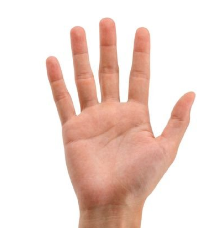

length 25
815 451
788 587
714 764
713 766
529 1131
200 1131
40 343
28 283
28 269
37 251
44 242
162 98
173 87
177 85
185 82
188 81
333 36
347 35
358 35
370 36
552 85
563 92
570 98
572 100
815 430
(815, 451) ---> (788, 587)
(788, 587) ---> (714, 764)
(714, 764) ---> (713, 766)
(713, 766) ---> (529, 1131)
(529, 1131) ---> (200, 1131)
(200, 1131) ---> (40, 343)
(40, 343) ---> (28, 283)
(28, 283) ---> (28, 269)
(28, 269) ---> (37, 251)
(37, 251) ---> (44, 242)
(44, 242) ---> (162, 98)
(162, 98) ---> (173, 87)
(173, 87) ---> (177, 85)
(177, 85) ---> (185, 82)
(185, 82) ---> (188, 81)
(188, 81) ---> (333, 36)
(333, 36) ---> (347, 35)
(347, 35) ---> (358, 35)
(358, 35) ---> (370, 36)
(370, 36) ---> (552, 85)
(552, 85) ---> (563, 92)
(563, 92) ---> (570, 98)
(570, 98) ---> (572, 100)
(572, 100) ---> (815, 430)


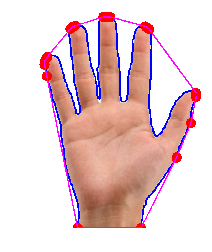

In [2]:
# Import the original image
img = cv2.imread('palm2.jpg')
imshow(img)

# create binary version
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# define range of hsv
lower = np.array([0, 10, 60], dtype = "uint8") 
upper = np.array([20, 155, 255], dtype = "uint8")

# create a mask and clean it up
mask = cv2.inRange(hsv, lower, upper)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 5)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 5)
mask = cv2.medianBlur(mask, 5)

# Get the contour of the hand and draw it on the original image
im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
cv2.drawContours(img, [cnt], 0, (255,0,0), 7)

hull = cv2.convexHull(cnt, returnPoints = False) # returns the indices of contour points 
                                                 #c orresponding to the hull points.

print "length", len(hull)

for index in hull:
    x, y = cnt[index[0]][0]
    print x, y
    cv2.circle(img, (x, y), 1, (0,0,255), 50)
    
for i in range(len(hull)-1):
    
    index1 = hull[i][0]
    index2 = hull[i+1][0]    
    x1, y1 = cnt[index1][0]    
    x2, y2 = cnt[index2][0]
    
    print "{} ---> {}".format((x1, y1), (x2, y2))
    cv2.line(img, (x1, y1), (x2, y2), (255,0,255), 5)

imshow(img)     

In [3]:
def get_palm_circle(contour, mask):
    dist_max = np.zeros((mask.shape[0], mask.shape[1]))
    for y in range(0, mask.shape[0], 4):
        for x in range(0, mask.shape[1], 4):
            if mask[y, x]:
                dist_max[y, x] = cv2.pointPolygonTest(contour, (x, y), True)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(dist_max)
    return max_loc, max_val

In [4]:
# Distance between two vectors
def dist(v1, v2):
    return np.linalg.norm(np.array(v1)-v2)

# Angle between two vectors
def get_angle(v1, v2):
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    cos_theta = np.dot(v1, v2)
    return np.arccos(cos_theta)*(180/np.pi)

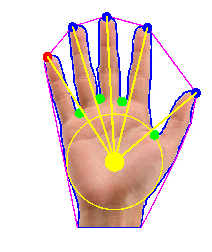

In [5]:
# Import the original image
img = cv2.imread('palm2.jpg')

# create binary version
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# define range of hsv
lower = np.array([0, 10, 60], dtype = "uint8") 
upper = np.array([20, 155, 255], dtype = "uint8")

# create a mask and clean it up
mask = cv2.inRange(hsv, lower, upper)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 5)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 5)
mask = cv2.medianBlur(mask, 5)

# Get the contour of the hand and draw it on the original image
im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
cv2.drawContours(img, [cnt], 0, (255,0,0), 7)

hull = cv2.convexHull(cnt, returnPoints = False) # returns the indices of contour points 
                                                 #c orresponding to the hull points.

    
defects = cv2.convexityDefects(cnt, hull)


# Maximum Inscribed Circle and palm's center
palm_center, palm_radius = get_palm_circle(cnt, mask)
cv2.circle(img, palm_center, int(palm_radius), (0,255,255), 5)
cv2.circle(img, palm_center, 1, (0,255,255), 100)

# # Minimum Enclosing Circle
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# cv2.circle(img, center, radius, (0,255,255), 5)

# # Minimum Area Rectangle
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cv2.drawContours(img,[box],0,(0,255,0),3)



fingers = []

for defect in defects:
    start_pt,end_pt,farthest_pt,dist_to_farthest= defect[0]

    start = (cnt[start_pt][0])
    end = (cnt[end_pt][0])
    far = (cnt[farthest_pt][0])
    
    # Draw the convex hull
    cv2.line(img, tuple(start), tuple(end), (255,0,255), 5)
    
    length = dist(far, end)
    length_to_center = dist(start, palm_center)
        
    # use depth distance instead of "length"    
    
    if length > palm_radius * 0.9 and length_to_center > palm_radius*0.9:
        defect_angle = get_angle(start - far, end - far)
        if defect_angle >= 20 and defect_angle <= 120:
            fingers.append([start, far, end])
            
for i in range(len(fingers)-1):
    t1 = fingers[i][2]
    t2 = fingers[i+1][0]
    t = np.mean([t1, t2], axis=0).astype(int)
    fingers[i][-1] = t
    fingers[i+1][0] = t
    
    
for finger in fingers:
    cv2.circle(img, tuple(finger[0]), 1, (255, 0, 0), 50)
    cv2.circle(img, tuple(finger[1]), 1, (0, 255, 0), 50)
    cv2.circle(img, tuple(finger[2]), 1, (0, 0, 255), 50)
#     cv2.line(img, tuple(finger[0]), tuple(finger[1]), (255, 255, 0), 10)
#     cv2.line(img, tuple(finger[1]), tuple(finger[2]), (0, 255, 255), 10)
    
    cv2.line(img, tuple(palm_center), tuple(finger[2]), (0, 255, 255), 10)
    cv2.line(img, tuple(palm_center), tuple(finger[0]), (0, 255, 255), 10)


imshow(img)     

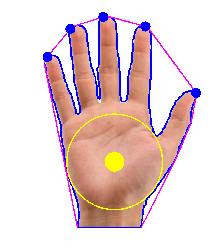

In [6]:
# Import the original image
img = cv2.imread('palm2.jpg')

# create binary version
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# define range of hsv
lower = np.array([0, 10, 60], dtype = "uint8") 
upper = np.array([20, 155, 255], dtype = "uint8")

# create a mask and clean it up
mask = cv2.inRange(hsv, lower, upper)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 5)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 5)
mask = cv2.medianBlur(mask, 5)

# Get the contour of the hand and draw it on the original image
im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
cv2.drawContours(img, [cnt], 0, (255,0,0), 7)

hull = cv2.convexHull(cnt, returnPoints = False) # returns the indices of contour points 
                                                 #c orresponding to the hull points.

    
defects = cv2.convexityDefects(cnt, hull)


# Maximum Inscribed Circle and palm's center
palm_center, palm_radius = get_palm_circle(cnt, mask)
cv2.circle(img, palm_center, int(palm_radius), (0,255,255), 5)
cv2.circle(img, palm_center, 1, (0,255,255), 100)

# # Minimum Enclosing Circle
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# cv2.circle(img, center, radius, (0,255,255), 5)

# # Minimum Area Rectangle
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cv2.drawContours(img,[box],0,(0,255,0),3)

# Array for storing finger points
fingers = []

for defect in defects:
    start_pt,end_pt,farthest_pt,dist_to_farthest= defect[0]

    start = (cnt[start_pt][0])
    end = (cnt[end_pt][0])
    far = (cnt[farthest_pt][0])
     
    
    # Draw the convex hull
    cv2.line(img, tuple(start), tuple(end), (255,0,255), 5)
    
    # to get the floating-point value of the depth will be fixpt_depth/256.0
    length = dist_to_farthest/256.0
    length_to_center = dist(start, palm_center)
    
    if length > palm_radius and length_to_center > palm_radius:
        defect_angle = get_angle(start - far, end - far)
        if defect_angle >= 20 and defect_angle <= 120:
            fingers.append([start_pt, end_pt])

fingertips = [None for i in range(len(fingers)+1)]


for i in range(len(fingers)):
    if i == len(fingers)-1:
        fingertips[i] = fingers[i][0]
        fingertips[i+1] = fingers[i][1]
    else:
        fingertips[i] = fingers[i][0]
    
for fingertip_i in fingertips:
    fingertip_point = tuple(cnt[fingertip_i][0])    
    cv2.circle(img, fingertip_point, 1, (255, 0, 0), 50)

imshow(img)     

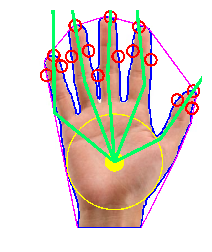

In [7]:
# Import the original image
img = cv2.imread('palm2.jpg')

# create binary version
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# define range of hsv
lower = np.array([0, 10, 60], dtype = "uint8") 
upper = np.array([20, 155, 255], dtype = "uint8")

# create a mask and clean it up
mask = cv2.inRange(hsv, lower, upper)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 5)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 5)
mask = cv2.medianBlur(mask, 5)

# Get the contour of the hand and draw it on the original image
im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

cv2.drawContours(img, [cnt], 0, (255,0,0), 7)

hull = cv2.convexHull(cnt, returnPoints = False) # returns the indices of contour points 
                                                 #c orresponding to the hull points.
    
defects = cv2.convexityDefects(cnt, hull)


# Maximum Inscribed Circle and palm's center
palm_center, palm_radius = get_palm_circle(cnt, mask)
cv2.circle(img, palm_center, int(palm_radius), (0,255,255), 5)
cv2.circle(img, palm_center, 1, (0,255,255), 100)

# # Minimum Enclosing Circle
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# cv2.circle(img, center, radius, (0,255,255), 5)

# # Minimum Area Rectangle
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cv2.drawContours(img,[box],0,(0,255,0),3)

# Array for storing finger points
fingers = []

for defect in defects:
    start_pt,end_pt,farthest_pt,dist_to_farthest= defect[0]

    start = (cnt[start_pt][0])
    end = (cnt[end_pt][0])
    far = (cnt[farthest_pt][0])
     
    
    # Draw the convex hull
    cv2.line(img, tuple(start), tuple(end), (255,0,255), 5)
    
    # to get the floating-point value of the depth will be fixpt_depth/256.0
    length = dist_to_farthest/256.0
    length_to_center = dist(start, palm_center)
    
    if length > palm_radius and length_to_center > palm_radius:
        defect_angle = get_angle(start - far, end - far)
        if defect_angle >= 20 and defect_angle <= 120:
            fingers.append([start_pt, end_pt])

fingertips = [None for i in range(len(fingers)+1)]

for i in range(len(fingers)):
    if i == len(fingers)-1:
        fingertips[i] = fingers[i][0]
        fingertips[i+1] = fingers[i][1]
    else:
        fingertips[i] = fingers[i][0]
        
# k-curvature
k = 45

optimal_fingertip_indices = []
finger_point_index = []

for fingertip_index in fingertips:
    min_angle = float("inf")
    for point_index in range(fingertip_index-30, fingertip_index+30): 
        fingertip_point = cnt[point_index][0]
        side1 = cnt[point_index+k][0]
        side2 = cnt[point_index-k][0]

        # curvature angle
        curvature_angle = get_angle(side1 - fingertip_point, side2 - fingertip_point)
        if curvature_angle < min_angle:
            min_angle = curvature_angle
            optimal_fingertip_index = point_index
#             print min_angle
            
    optimal_fingertip_indices.append(optimal_fingertip_index)
    cv2.circle(img, tuple(cnt[optimal_fingertip_index][0]), 30, (0, 0, 255), 10)    
    cv2.circle(img, tuple(cnt[optimal_fingertip_index+k][0]), 30, (0, 0, 255), 10)    
    cv2.circle(img, tuple(cnt[optimal_fingertip_index-k][0]), 30, (0, 0, 255), 10)    

        
    fingerpoint = np.mean([cnt[optimal_fingertip_index-k][0], cnt[optimal_fingertip_index+k][0]], axis=0).astype(int)
#     cv2.circle(img, tuple(fingerpoint), 1, (255, 0, 0), 50)    
    
    # determine angle between the horizontal axis and the vector that goes from fingerpoint to fingertip
    angle = get_angle([100, 0],  fingerpoint - cnt[optimal_fingertip_index][0])*3.14/180.0
    
    # Points that show finger orientation
    # Point 1
    x1 = cnt[optimal_fingertip_index][0][0] + palm_radius*1.2 * np.cos(angle)
    y1 = cnt[optimal_fingertip_index][0][1] + palm_radius*1.2 * np.sin(angle)
    point1 = [int(x1), int(y1)]
    
    # Point 2
    x2 = cnt[optimal_fingertip_index][0][0] - palm_radius * np.cos(angle)
    y2 = cnt[optimal_fingertip_index][0][1] - palm_radius * np.sin(angle)
    point2 = [int(x2), int(y2)]    

    cv2.line(img, tuple(point1), tuple(point2), (100, 255, 0), 15)
    cv2.line(img, tuple(palm_center), tuple(point1), (100, 255, 0), 15)



        
# #     cv2.line(img, tuple(finger[0]), tuple(finger[1]), (255, 255, 0), 10)
# #     cv2.line(img, tuple(finger[1]), tuple(finger[2]), (0, 255, 255), 10)
    
#     cv2.line(img, tuple(palm_center), fingertip_point, (0, 255, 255), 10)


imshow(img)     

In [8]:
from scipy.interpolate import splprep, splev
def smoothenContour(cnt):
    x,y = cnt.T
    # Convert from numpy arrays to normal arrays
    x = x.tolist()[0]
    y = y.tolist()[0]
    # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splprep.html
    tck, u = splprep([x,y], u=None, s=1.0, per=1)
    # https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linspace.html
    u_new = np.linspace(u.min(), u.max(), int(len(cnt)*0.8))
    # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splev.html
    x_new, y_new = splev(u_new, tck, der=0)
    # Convert it back to numpy format for opencv to be able to display it
    res_array = [[[int(i[0]), int(i[1])]] for i in zip(x_new,y_new)]
    return np.asarray(res_array, dtype=np.int32)

/usr/local/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][1671]=x[0][0]
  (i, m, i)))



DEFECT ANGLES
46.5230820653
24.2219376533
20.9027687604
23.8814106497


  CURVATURE ANGLE 48.4466336597
side1, fingertip_point, side2
[703 490] [795 417] [789 527] 


  CURVATURE ANGLE 50.2180171236
side1, fingertip_point, side2
[489 183] [537  81] [586 186] 


  CURVATURE ANGLE 48.1099489158
side1, fingertip_point, side2
[316 148] [338  35] [400 117] 


  CURVATURE ANGLE 46.9978798565
side1, fingertip_point, side2
[163 179] [201  77] [252 179] 


  CURVATURE ANGLE 45.5908613797
side1, fingertip_point, side2
[ 41 351] [ 52 237] [121 319] 




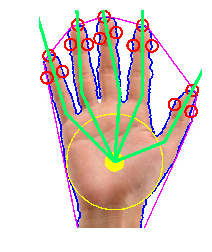

In [9]:
# Import the original image
img = cv2.imread('palm2.jpg')

# create binary version
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# define range of hsv
lower = np.array([0, 10, 60], dtype = "uint8") 
upper = np.array([20, 155, 255], dtype = "uint8")

# create a mask and clean it up
mask = cv2.inRange(hsv, lower, upper)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 5)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 5)
mask = cv2.medianBlur(mask, 5)

# Get the contour of the hand and draw it on the original image
im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
cnt = smoothenContour(cnt)

cv2.drawContours(img, [cnt], 0, (255,0,0), 7)

hull = cv2.convexHull(cnt, returnPoints = False) # returns the indices of contour points 
                                                 #c orresponding to the hull points.
defects = cv2.convexityDefects(cnt, hull)


# Maximum Inscribed Circle and palm's center
palm_center, palm_radius = get_palm_circle(cnt, mask)
cv2.circle(img, palm_center, int(palm_radius), (0,255,255), 5)
cv2.circle(img, palm_center, 1, (0,255,255), 100)

# # Minimum Enclosing Circle
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# cv2.circle(img, center, radius, (0,255,255), 5)

# # Minimum Area Rectangle
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cv2.drawContours(img,[box],0,(0,255,0),3)

# Array for storing finger points
fingers = []

distances = []

print "\nDEFECT ANGLES"
for defect in defects:
    start_pt,end_pt,farthest_pt,dist_to_farthest= defect[0]

    start = (cnt[start_pt][0])
    end = (cnt[end_pt][0])
    far = (cnt[farthest_pt][0])
        
    # Draw the convex hull
    cv2.line(img, tuple(start), tuple(end), (255,0,255), 5)
    
    # to get the floating-point value of the depth will be fixpt_depth/256.0
    length = dist_to_farthest/256.0
    length_to_center = dist(start, palm_center)
    
    if length > palm_radius and length_to_center > palm_radius:
        defect_angle = get_angle(start - far, end - far)
        print defect_angle
        if defect_angle >= 20 and defect_angle <= 120:
            fingers.append([start_pt, end_pt])
            distances.append(dist_to_farthest/256.0)
print "\n"
            
fingertips = [None for i in range(len(fingers)+1)]

for i in range(len(fingers)):    
    if i == len(fingers)-1:
        fingertips[i] = fingers[i][0]
        fingertips[i+1] = fingers[i][1]
    else:
        fingertips[i] = fingers[i][0]
        
        
distances2 = [None for i in range(len(fingers)+1)]

for i in range(len(fingers)):    
    if i == 0:
        distances2[i] = distances[i]
    elif i == len(fingers)-1:
        distances2[i] = (distances[i-1]+distances[i])/2
        distances2[i+1] = distances[i]
    else:
        distances2[i] = (distances[i-1]+distances[i])/2
        
# k-curvature
k = 30

optimal_fingertip_indices = []
finger_point_index = []

i = 0
for fingertip_index in fingertips:
    min_angle = float("inf")
    for point_index in range(fingertip_index-30, fingertip_index+30): 
        fingertip_point = cnt[point_index][0]
        side1 = cnt[point_index+k][0]
        side2 = cnt[point_index-k][0]

        # curvature angle
        curvature_angle = get_angle(side1 - fingertip_point, side2 - fingertip_point)
        if min_angle > curvature_angle:
            min_angle = curvature_angle
            optimal_fingertip_index = point_index
            
            
    fingertip_point = cnt[optimal_fingertip_index][0]
    side1 = cnt[optimal_fingertip_index+k][0]
    side2 = cnt[optimal_fingertip_index-k][0]
    print "  CURVATURE ANGLE", get_angle(side2 - fingertip_point, side1 - fingertip_point)
    print "side1, fingertip_point, side2"
    print side1, fingertip_point, side2, "\n\n"
    
    optimal_fingertip_indices.append(optimal_fingertip_index)
    cv2.circle(img, tuple(cnt[optimal_fingertip_index][0]), 30, (0, 0, 255), 10)    
    cv2.circle(img, tuple(cnt[optimal_fingertip_index+k][0]), 30, (0, 0, 255), 10)    
    cv2.circle(img, tuple(cnt[optimal_fingertip_index-k][0]), 30, (0, 0, 255), 10)    

        
    fingerpoint = np.mean([cnt[optimal_fingertip_index-k][0], cnt[optimal_fingertip_index+k][0]], axis=0).astype(int)
#     cv2.circle(img, tuple(fingerpoint), 1, (255, 0, 0), 50)    
    
    # determine angle between the horizontal axis and the vector that goes from fingerpoint to fingertip
    angle = get_angle([100, 0],  fingerpoint - cnt[optimal_fingertip_index][0])*3.14/180.0
    
    # Points that show finger orientation
    # Point 1
    x1 = cnt[optimal_fingertip_index][0][0] + distances2[i] * np.cos(angle)
    y1 = cnt[optimal_fingertip_index][0][1] + distances2[i] * np.sin(angle)
    point1 = [int(x1), int(y1)]
    
    # Point 2
    x2 = cnt[optimal_fingertip_index][0][0] - palm_radius * np.cos(angle)
    y2 = cnt[optimal_fingertip_index][0][1] - palm_radius * np.sin(angle)
    point2 = [int(x2), int(y2)]    
    cv2.line(img, tuple(point1), tuple(point2), (100, 255, 0), 15)
    cv2.line(img, tuple(palm_center), tuple(point1), (100, 255, 0), 15)

    i+=1

imshow(img)     

In [10]:
def getHandContours(mask):
    # Get the contour of the hand and draw it on the original image
    im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate areas
    areas = [cv2.contourArea(cont) for cont in contours]

    # Only keep the largest contour
    cnt = contours[np.argmax(areas)]
    return cnt
    #     return smoothenContour(cnt)

In [11]:
def augmentHand(img):
    mask = segmentImage_ycrcb(img) # Mask
    
    cnt = getHandContours(mask) # Hand Contour
    cv2.drawContours(img, [cnt], 0, (255,0,0), 5)

    
    hull = cv2.convexHull(cnt, returnPoints = False) # returns the indices of contour points 
                                                     # corresponding to the hull points.
    defects = cv2.convexityDefects(cnt, hull)


    # Maximum Inscribed Circle and palm's center
    palm_center, palm_radius = get_palm_circle(cnt, mask)
    cv2.circle(img, palm_center, int(palm_radius), (0,255,255), 5)
    cv2.circle(img, palm_center, 1, (0,255,255), 100)

    # # Minimum Enclosing Circle
    # (x,y),radius = cv2.minEnclosingCircle(cnt)
    # center = (int(x),int(y))
    # radius = int(radius)
    # cv2.circle(img, center, radius, (0,255,255), 5)

    # # Minimum Area Rectangle
    # rect = cv2.minAreaRect(cnt)
    # box = cv2.boxPoints(rect)
    # box = np.int0(box)
    # cv2.drawContours(img,[box],0,(0,255,0),3)

    # Array for storing finger points
    fingers = []

    distances = []

    for defect in defects:
        start_pt,end_pt,farthest_pt,dist_to_farthest= defect[0]

        start = (cnt[start_pt][0])
        end = (cnt[end_pt][0])
        far = (cnt[farthest_pt][0])

        # Draw the convex hull
        cv2.line(img, tuple(start), tuple(end), (255,0,255), 5)

        # to get the floating-point value of the depth will be fixpt_depth/256.0
        length = dist_to_farthest/256.0
        length_to_center = dist(start, palm_center)

        if length > palm_radius and length_to_center > palm_radius:
            defect_angle = get_angle(start - far, end - far)
            if defect_angle >= 20 and defect_angle <= 120:
                fingers.append([start_pt, end_pt])
                distances.append(dist_to_farthest/256.0)


    fingertips = [None for i in range(len(fingers)+1)]

    for i in range(len(fingers)):    
        if i == len(fingers)-1:
            fingertips[i] = fingers[i][0]
            fingertips[i+1] = fingers[i][1]
        else:
            fingertips[i] = fingers[i][0]


    distances2 = [None for i in range(len(fingers)+1)]

    for i in range(len(fingers)):    
        if i == 0:
            distances2[i] = distances[i]
        elif i == len(fingers)-1:
            distances2[i] = (distances[i-1]+distances[i])/2
            distances2[i+1] = distances[i]
        else:
            distances2[i] = (distances[i-1]+distances[i])/2

    # k-curvature
    k = 30

    optimal_fingertip_indices = []
    finger_point_index = []

    i = 0
    for fingertip_index in fingertips:
        min_angle = float("inf")
        for point_index in range(fingertip_index-30, fingertip_index+30): 
            fingertip_point = cnt[point_index][0]
            side1 = cnt[point_index+k][0]
            side2 = cnt[point_index-k][0]

            # curvature angle
            curvature_angle = get_angle(side1 - fingertip_point, side2 - fingertip_point)
            if curvature_angle < min_angle:
                min_angle = curvature_angle
                optimal_fingertip_index = point_index
    #             print min_angle

        optimal_fingertip_indices.append(optimal_fingertip_index)
        cv2.circle(img, tuple(cnt[optimal_fingertip_index][0]), 30, (0, 0, 255), 10)    
    #     cv2.circle(img, tuple(cnt[optimal_fingertip_index+k][0]), 30, (0, 0, 255), 10)    
    #     cv2.circle(img, tuple(cnt[optimal_fingertip_index-k][0]), 30, (0, 0, 255), 10)    


        fingerpoint = np.mean([cnt[optimal_fingertip_index-k][0], cnt[optimal_fingertip_index+k][0]], axis=0).astype(int)
    #     cv2.circle(img, tuple(fingerpoint), 1, (255, 0, 0), 50)    

        # determine angle between the horizontal axis and the vector that goes from fingerpoint to fingertip
        angle = get_angle([100, 0],  fingerpoint - cnt[optimal_fingertip_index][0])*3.14/180.0

        # Points that show finger orientation
        # Point 1
        x1 = cnt[optimal_fingertip_index][0][0] + distances2[i] * np.cos(angle)
        y1 = cnt[optimal_fingertip_index][0][1] + distances2[i] * np.sin(angle)
        point1 = [int(x1), int(y1)]

        # Point 2
        x2 = cnt[optimal_fingertip_index][0][0] - palm_radius * np.cos(angle)
        y2 = cnt[optimal_fingertip_index][0][1] - palm_radius * np.sin(angle)
        point2 = [int(x2), int(y2)]    
        cv2.line(img, tuple(point1), tuple(point2), (100, 255, 0), 15)
        cv2.line(img, tuple(palm_center), tuple(point1), (100, 255, 0), 15)

        i+=1


In [12]:
imshow(saved_frame)     
augmentHand(saved_frame)
imshow(saved_frame)     


NameError: name 'saved_frame' is not defined

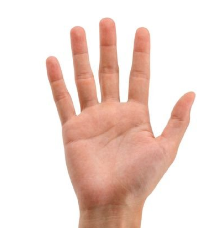

NameError: name 'segmentImage_hsv' is not defined

In [13]:
# Import the original image
img = cv2.imread('palm2.jpg')
imshow(img)     

imshow(segmentImage_hsv(img))

augmentHand(img)
imshow(img)     


In [14]:
def segmentImage_hsv(img):
    # create hsv version
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

    # define range of hsv (for skin color)
    min_HSV = np.array([0, 58, 30], dtype = "uint8")
    max_HSV = np.array([33, 255, 255], dtype = "uint8")

    # create a mask and clean it up
    mask = cv2.inRange(hsv, min_HSV, max_HSV)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 5)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 5)
    mask = cv2.medianBlur(mask, 5)   
    
    return mask

In [15]:
import numpy

In [16]:
def segmentImage_ycrcb(img):
    # Convert image to YCrCb
    imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)    
    
    # Constants for finding range of skin color in YCrCb
    min_YCrCb = numpy.array([0,133,77],numpy.uint8)
    max_YCrCb = numpy.array([255,173,127],numpy.uint8)
    
    # Convert image to YCrCb
    imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

    # Find region with skin tone in YCrCb image
    mask = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 5)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 3)
    mask = cv2.medianBlur(mask, 5)   
    
    return mask

In [27]:
import matplotlib.pyplot as plt
camera = cv2.VideoCapture(0)
# reduce frame size to speed it up
w = 640
camera.set(cv2.CAP_PROP_FRAME_WIDTH, w) 
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, w * 3/4) 
camera.set(cv2.CAP_PROP_EXPOSURE,-4) 

trained = False

while True:
    # Get frame at flip it
    ret, frame = camera.read()
    frame = cv2.flip(frame, 1)

    # Apply median blur
    frame = cv2.medianBlur(frame,5)
    mask = segmentImage_ycrcb(frame) # Mask
    cv2.imshow("MASK", mask)
    cnt = getHandContours(mask) # Hand Contour
    cv2.drawContours(frame, [cnt], 0, (0,255,0), 2)
    
#     print cv2.contourArea(cnt)
    if cv2.contourArea(cnt) > 15000:
        # Maximum Inscribed Circle and palm's center
        palm_center, palm_radius = get_palm_circle(cnt, mask)
        cv2.circle(frame, palm_center, int(palm_radius), (0,255,255), 3)
        cv2.circle(frame, palm_center, 1, (0,255,255), 6)

        # Minimum Enclosing Circle
        (x,y),radius = cv2.minEnclosingCircle(cnt)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(frame, center, radius, (255,0,0), 3)
        

        hull = cv2.convexHull(cnt, returnPoints = False)
        defects = cv2.convexityDefects(cnt, hull)
        

        # Array for storing finger points
        fingers = []
        distances = []

        for defect in defects:
            start_pt,end_pt,farthest_pt,dist_to_farthest= defect[0]

            start = (cnt[start_pt][0])
            end = (cnt[end_pt][0])
            far = (cnt[farthest_pt][0])

            # Draw the convex hull
            cv2.line(frame, tuple(start), tuple(end), (127,39,255), 3)

            # to get the floating-point value of the depth will be fixpt_depth/256.0
            length = dist_to_farthest/256.0
            length_to_center = dist(start, palm_center)

            if length > palm_radius*0.8:
                defect_angle = get_angle(start - far, end - far)
                
                if defect_angle >= 20 and defect_angle <= 120:
                    fingers.append([start_pt, end_pt])
                    distances.append(dist_to_farthest/256.0)

        if len(fingers) >= 1:
            fingertips = [None for i in range(len(fingers)+1)]
            for i in range(len(fingers)):    
                if i == len(fingers)-1:
                    fingertips[i] = fingers[i][0]
                    fingertips[i+1] = fingers[i][1]
                else:
                    fingertips[i] = fingers[i][0]

            # k-curvature
            k = 30

            optimal_fingertip_indices = []
            finger_point_index = []
            i = 0
            for fingertip_index in fingertips:
                min_angle = float("inf")
                for point_index in range(fingertip_index-20, fingertip_index+20): 
                    fingertip_point = cnt[point_index%len(cnt)][0]
                    
                    side1 = cnt[(point_index+k)%len(cnt)][0]
                    side2 = cnt[(point_index-k)%len(cnt)][0]

                    # curvature angle
                    curvature_angle = get_angle(side1 - fingertip_point, side2 - fingertip_point)
                    if min_angle > curvature_angle:
                        min_angle = curvature_angle
                        optimal_fingertip_index = point_index
                
                
                if min_angle <=60:
                    optimal_fingertip_indices.append(optimal_fingertip_index)

                    cv2.circle(frame, tuple(cnt[optimal_fingertip_index%len(cnt)][0]), 10, (255, 0, 255), 5) 
#                     cv2.circle(frame, tuple(cnt[(optimal_fingertip_index+k)%len(cnt)][0]), 15, (0, 0, 255), 5) 
#                     cv2.circle(frame, tuple(cnt[(optimal_fingertip_index-k)%len(cnt)][0]), 15, (0, 0, 255), 5) 

                    
                    fingerpoint = np.mean([cnt[(optimal_fingertip_index-k)%len(cnt)][0], cnt[(optimal_fingertip_index+k)%len(cnt)][0]], axis=0).astype(int)
                    #     cv2.circle(img, tuple(fingerpoint), 1, (255, 0, 0), 50)    

                    # determine angle between the horizontal axis and the vector that goes from fingerpoint to fingertip
                    angle = get_angle([100, 0],  fingerpoint - cnt[optimal_fingertip_index%len(cnt)][0])*3.14/180.0
                    
                    
                    if fingerpoint[1] < cnt[optimal_fingertip_index%len(cnt)][0][1]:
                        angle = 2 *3.14 - angle

                    i += 1    
                    # Points that show finger orientation
                    # Point 1
                    x1 = cnt[optimal_fingertip_index%len(cnt)][0][0] + palm_radius * np.cos(angle)
                    y1 = cnt[optimal_fingertip_index%len(cnt)][0][1] + palm_radius * np.sin(angle)
                    point1 = [int(x1), int(y1)]
    
                    # Point 2
                    x2 = cnt[optimal_fingertip_index%len(cnt)][0][0] - 3*palm_radius * np.cos(angle)
                    y2 = cnt[optimal_fingertip_index%len(cnt)][0][1] - 3*palm_radius * np.sin(angle)
                    point2 = [int(x2), int(y2)]    
                    cv2.line(frame, tuple(point1), tuple(point2), (255, 255, 255), 3)
        
    # Train when space bar is pressed
    if cv2.waitKey(5) == 32:
        saved_frame = frame
        imshow(saved_frame)
 
    elif cv2.waitKey(5) == 27:
        break  
    cv2.imshow("VideoFrame", frame)
    
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1) # extra waitKey sometimes needed to close camera window

ValueError: attempt to get argmax of an empty sequence

In [33]:
import matplotlib.pyplot as plt
camera = cv2.VideoCapture(0)
# reduce frame size to speed it up
w = 640
camera.set(cv2.CAP_PROP_FRAME_WIDTH, w) 
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, w * 3/4) 
camera.set(cv2.CAP_PROP_EXPOSURE,-4) 

trained = False

while True:
    # Get frame at flip it
    ret, frame = camera.read()
    frame = cv2.flip(frame, 1)

    mask_cnt = np.zeros(frame.shape[:2], dtype="uint8") * 255

    
    # Apply median blur
    frame = cv2.medianBlur(frame,5)
    mask = segmentImage_hsv(frame) # Mask
    cv2.imshow("MASK", mask)
    cnt = getHandContours(mask) # Hand Contour
    
    
    
    cv2.drawContours(mask_cnt, [cnt], -1, 1, -1)
    frame = cv2.bitwise_and(frame, frame, mask=mask_cnt)
    
    
#     print cv2.contourArea(cnt)
    if cv2.contourArea(cnt) > 15000:
        # Maximum Inscribed Circle and palm's center
        palm_center, palm_radius = get_palm_circle(cnt, mask)
        cv2.circle(frame, palm_center, int(palm_radius), (0,255,255), 3)
        cv2.circle(frame, palm_center, 1, (0,255,255), 6)

        # Minimum Enclosing Circle
        (x,y),radius = cv2.minEnclosingCircle(cnt)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(frame, center, radius, (255,0,0), 3)
        

        hull = cv2.convexHull(cnt, returnPoints = False)
        defects = cv2.convexityDefects(cnt, hull)
        

        # Array for storing finger points
        fingers = []
        distances = []

        for defect in defects:
            start_pt,end_pt,farthest_pt,dist_to_farthest= defect[0]

            start = (cnt[start_pt][0])
            end = (cnt[end_pt][0])
            far = (cnt[farthest_pt][0])

            # Draw the convex hull
            cv2.line(frame, tuple(start), tuple(end), (127,39,255), 3)

            # to get the floating-point value of the depth will be fixpt_depth/256.0
            length = dist_to_farthest/256.0
            length_to_center = dist(start, palm_center)

            if length > palm_radius*0.8:
                defect_angle = get_angle(start - far, end - far)
                
                if defect_angle >= 20 and defect_angle <= 120:
                    fingers.append([start_pt, end_pt])
                    distances.append(dist_to_farthest/256.0)

        if len(fingers) >= 1:
            fingertips = [None for i in range(len(fingers)+1)]
            for i in range(len(fingers)):    
                if i == len(fingers)-1:
                    fingertips[i] = fingers[i][0]
                    fingertips[i+1] = fingers[i][1]
                else:
                    fingertips[i] = fingers[i][0]

            # k-curvature
            k = 30

            optimal_fingertip_indices = []
            finger_point_index = []
            i = 0
            for fingertip_index in fingertips:
                min_angle = float("inf")
                for point_index in range(fingertip_index-20, fingertip_index+20): 
                    fingertip_point = cnt[point_index%len(cnt)][0]
                    
                    side1 = cnt[(point_index+k)%len(cnt)][0]
                    side2 = cnt[(point_index-k)%len(cnt)][0]

                    # curvature angle
                    curvature_angle = get_angle(side1 - fingertip_point, side2 - fingertip_point)
                    if min_angle > curvature_angle:
                        min_angle = curvature_angle
                        optimal_fingertip_index = point_index
                
                
                if min_angle <=60:
                    optimal_fingertip_indices.append(optimal_fingertip_index)

                    cv2.circle(frame, tuple(cnt[optimal_fingertip_index%len(cnt)][0]), 10, (255, 0, 255), 5) 
#                     cv2.circle(frame, tuple(cnt[(optimal_fingertip_index+k)%len(cnt)][0]), 15, (0, 0, 255), 5) 
#                     cv2.circle(frame, tuple(cnt[(optimal_fingertip_index-k)%len(cnt)][0]), 15, (0, 0, 255), 5) 

                    
                    fingerpoint = np.mean([cnt[(optimal_fingertip_index-k)%len(cnt)][0], cnt[(optimal_fingertip_index+k)%len(cnt)][0]], axis=0).astype(int)
                    #     cv2.circle(img, tuple(fingerpoint), 1, (255, 0, 0), 50)    

                    # determine angle between the horizontal axis and the vector that goes from fingerpoint to fingertip
                    angle = get_angle([100, 0],  fingerpoint - cnt[optimal_fingertip_index%len(cnt)][0])*3.14/180.0
                    
                    
                    if fingerpoint[1] < cnt[optimal_fingertip_index%len(cnt)][0][1]:
                        angle = 2 *3.14 - angle

                    i += 1    
                    # Points that show finger orientation
                    # Point 1
                    x1 = cnt[optimal_fingertip_index%len(cnt)][0][0] + palm_radius * np.cos(angle)
                    y1 = cnt[optimal_fingertip_index%len(cnt)][0][1] + palm_radius * np.sin(angle)
                    point1 = [int(x1), int(y1)]
    
                    # Point 2
                    x2 = cnt[optimal_fingertip_index%len(cnt)][0][0] - 3*palm_radius * np.cos(angle)
                    y2 = cnt[optimal_fingertip_index%len(cnt)][0][1] - 3*palm_radius * np.sin(angle)
                    point2 = [int(x2), int(y2)]    
                    cv2.line(frame, tuple(point1), tuple(point2), (255, 255, 255), 3)
        
    # Train when space bar is pressed
    if cv2.waitKey(5) == 32:
        saved_frame = frame
        imshow(saved_frame)
 
    elif cv2.waitKey(5) == 27:
        break  
    cv2.imshow("VideoFrame", frame)
    
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1) # extra waitKey sometimes needed to close camera window

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arccos
  # Remove the CWD from sys.path while we load stuff.


-1

In [12]:
def convolve(B, r):
    D = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    cv2.filter2D(B, -1, D, B)
    return B

In [31]:
import matplotlib.pyplot as plt
camera = cv2.VideoCapture(0)
# reduce frame size to speed it up
w = 640
camera.set(cv2.CAP_PROP_FRAME_WIDTH, w) 
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, w * 3/4) 
camera.set(cv2.CAP_PROP_EXPOSURE,-4) 

trained = False

while True:
    # Get frame at flip it
    ret, frame = camera.read()
    frame = cv2.flip(frame, 1)
    
    # Apply median blur
    frame = cv2.medianBlur(frame,5)
    
    # converting frame to HSV
    frame_hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    
    # Region of Interest
    roi_hsv = frame_hsv[25:75, 25:75]  

    # Train when space bar is pressed
    if cv2.waitKey(5) == 32:
        
        # Get the histogram of the region of interest
        M = cv2.calcHist([roi_hsv],channels=[0, 1], mask=None, histSize=[16,16], ranges=[0, 180, 0, 256])
        print "Histogram Calculated"
        plt.plot(M)
        plt.show()
        trained = True
        cv2.rectangle(frame,(25,25),(75,75),(225,225,255),3)
        imshow(frame)
    elif cv2.waitKey(5) == 27:
        break  
    
    if trained:
        # Backpropagation of the original frame with the histogram M
        B = cv2.calcBackProject([frame_hsv], channels=[0,1], hist=M, 
                         ranges=[0,180,0,256], scale=1)
        B = convolve(B, r=5)
        cv2.imshow("Histogram Backprojection", B)
    
        # Create a mask
        _, mask = cv2.threshold(B, 70, 255, cv2.THRESH_BINARY)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 3)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 3)
        mask = cv2.medianBlur(mask, 5)

        cv2.imshow("Mask", mask)
        
        # Find contours
        im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # Calculate areas
        areas = [cv2.contourArea(cont) for cont in contours]
        
        # Only keep the largest contour
        cnt = contours[np.argmax(areas)]
        
#         Mom = cv2.moments(cnt)
#         cx = int(Mom['m10']/Mom['m00']) # x-coordinate of the centroid
#         cy = int(Mom['m01']/Mom['m00']) # y-coordinate of the centroid
#         cv2.putText(frame,str(cnt_area),(cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),3)
        cv2.drawContours(frame, [cnt], 0, (255,255,255), 3)
        
        cv2.putText(frame,"TRACKING",(10,450), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),3)
    
        # Get the convex hull
        hull = cv2.convexHull(cnt, returnPoints = False)
        print "\n\n CONVEX HULL"

        print hull 
        
        # Get the convexity defects
        defects = cv2.convexityDefects(cnt, hull)
        
        
        for defect in defects:
            s,e,f,d = defect[0]
            start = tuple(cnt[s][0])
            end = tuple(cnt[e][0])
            far = tuple(cnt[f][0])
            
            # Draw the convex hull
            cv2.line(frame, start, end, (255,0,255), 2)
            
            # Draw the convex defect approximation
            cv2.line(frame, start, far, (255,0,0), 2)
#             cv2.line(frame, far, end, (0,255,0), 2)
                        
#             # Draw the fingertips
#             cv2.circle(frame, start, 10, (0,0,255), 2)
        
    else:
        cv2.putText(frame,"TRAINING",(10,450), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),3)
    
    # Draw a box
    cv2.rectangle(frame,(25,25),(75,75),(225,225,255),3)
    cv2.imshow("Frame", frame)
    
    if cv2.waitKey(5) == 113:
        imshow(frame)
        imshow(B)
        imshow(mask)
    
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1) # extra waitKey sometimes needed to close camera window

-1

In [30]:
camera = cv2.VideoCapture(0)
# reduce frame size to speed it up
w = 640
camera.set(cv2.CAP_PROP_FRAME_WIDTH, w) 
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, w * 3/4) 
camera.set(cv2.CAP_PROP_EXPOSURE,-4) 
background_captured = False

while True:
    # Get frame at flip it
    ret, frame = camera.read()
    frame = cv2.flip(frame, 1)
    
    # Apply median blur
    frame = cv2.medianBlur(frame,5)
    
    # convert each frame from BGR to HSV colour space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of hsv
    lower_blue = np.array([105,int(50*2.55),int(40*2.55)])
    upper_blue = np.array([135,int(95*2.55),int(95*2.55)])
    
    # create a mask
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations = 1)
    
    # bitwise_and of the frame and the mask
    res = cv2.bitwise_and(frame,frame, mask=mask)
    
    cv2.imshow("Mask", mask)
    cv2.imshow('Result',res)

    # Find contours
    im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        # Area of the bulb
        cnt_area = cv2.contourArea(cnt)

        # drawig contours and displaying areas for bulbs of large areas
        if cnt_area > 300:
            M = cv2.moments(cnt)
            cx = int(M['m10']/M['m00']) # x-coordinate of the centroid
            cy = int(M['m01']/M['m00']) # y-coordinate of the centroid
            cv2.putText(frame,str(cnt_area),(cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),3)
            cv2.drawContours(frame, [cnt], 0, (255,255,255), 3)
        
    if cv2.waitKey(5) == 32:
        cv2.imwrite('myframe.png',frame)
    elif cv2.waitKey(5) == 27:
        break  
    elif cv2.waitKey(5) == 113:
        imshow(frame)
        imshow(res)       
        imshow(mask)

    cv2.imshow("Frame", frame)
    
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1) # extra waitKey sometimes needed to close camera window


-1

# Objective 2

For accomplishing this exercise I used "Skin Detection" tutorial presented by Nalin and "Colour Detection" tutorial presented by Petri on 1/26/2018. Also, I consulted OpenCV documentation for "Histogram Backprojection" (https://docs.opencv.org/3.1.0/dc/df6/tutorial_py_histogram_backprojection.html).
Online colour picker (http://imagecolorpicker.com) was used for finding a range of hue values for Objective 1.